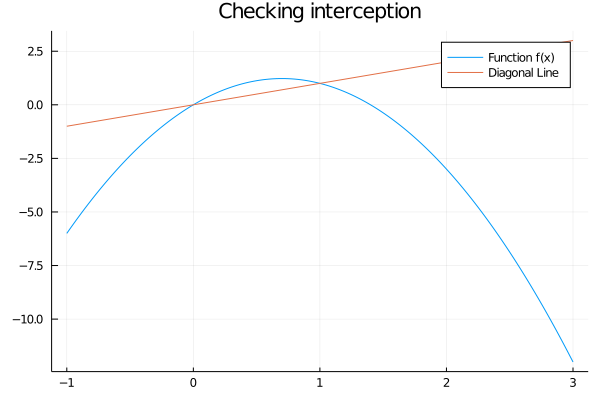

In [2]:
# Import packages and use "GR" as the plotting backend.
using Plots;gr()

# The example function 
r = 0.7
f(x) = r*x.*(3-x)
f(x) = x*(1 + 2.5(1-x)) # in the note, case : r>2

# Check if the example function intercept with f(x) = x.
function check_intercept(a,b)
    range = LinRange(a,b,1000)
    plot(range, f.(range),label = "Function f(x)")
    plot!(x->x,range, label = "Diagonal Line")
    title!("Checking interception")
end 
check_intercept(-1,3)

In [5]:
# Define the main cobweb function and display each iterate step with line plots
function cobweb(f, a, b, N, x0)
    @show interval = range(a, b,length = 100) # or LinRange(a,b,N)
    plot(interval,f.(interval))
    # Plot orbit starting at x0
    plt1 = scatter!([x0],[x0],c=:red, markerstrokecolor=:red)
    x = zeros(N);x[1] = x0; [x[i+1]=f(x[i]) for i in 1:N-1];
    @show x
    for i=1:N-1
        plot!([x[i],x[i]],[x[i],x[i+1]],c=:red,legend = false)
        plot!([x[i],x[i+1]],[x[i+1],x[i+1]],c=:green,legend = false)
    end 
    # xlims!(a,b)
    # ylims!(a,b)
    plot!(x -> x, 0, 1.5*maximum(x))
    display(plt1)
end



cobweb (generic function with 1 method)

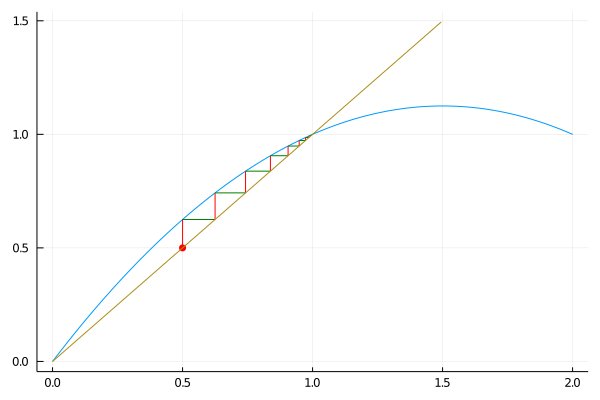

interval = range(a, b, length = 100) = 0.0:0.020202020202020204:2.0
x = [0.5, 0.625, 0.7421875, 0.837860107421875, 0.9057853813283145, 0.9484544934784317, 0.9728987771179333, 0.9860821504181149, 0.9929442219405654, 0.9964472189682707]


In [12]:
# Plot an example
r = 0.5
f(x) = x*(1 + r*(1-x))
a = 0;b=2;N =10;x0=0.5
cobweb(f, a, b, N, x0)

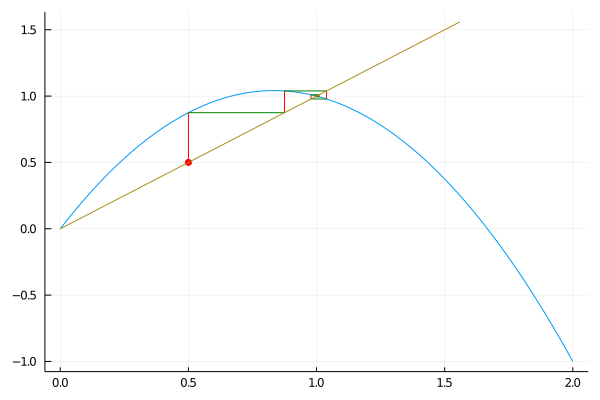

interval = range(a, b, length = 100) = 0.0:0.020202020202020204:2.0
x = [0.5, 0.875, 1.0390625, 0.978179931640625, 1.0101958611048758, 0.9947461360720572, 1.0025855273347115, 0.9986972089052464, 1.000648849650422, 0.9996749436659857]


In [10]:
# Plot an example
r = 1.5
f(x) = x*(1 + r*(1-x))
a = 0;b=2;N =10;x0=0.5
cobweb(f, a, b, N, x0)

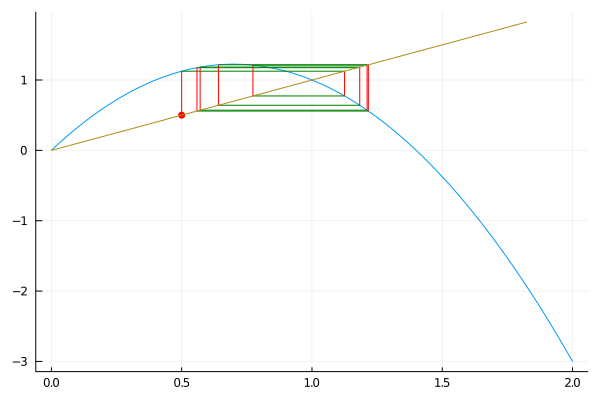

interval = range(a, b, length = 100) = 0.0:0.020202020202020204:2.0
x = [0.5, 1.125, 0.7734375, 1.211517333984375, 0.5708750425837934, 1.183316863430657, 0.6410120238088791, 1.2163010466621893, 0.5585830730388196, 1.1750031319221403]


In [13]:
# Plot an example
r = 2.5
f(x) = x*(1 + r*(1-x))
a = 0;b=2;N =10;x0=0.5
cobweb(f, a, b, N, x0)

## Using `InteractiveChaos` package 

In [2]:
# Load package
using InteractiveChaos, GLMakie, DynamicalSystems

In [4]:
# the second range is a convenience for intermittency example of logistic
rrange = 1:0.001:4.0
# rrange = (rc = 1 + sqrt(8); [rc, rc - 1e-5, rc - 1e-3])

lo = Systems.logistic(0.4; r=rrange[1])

interactive_cobweb(lo, rrange, 5)